**Phase 4 Project: TIME SERIES FORECAST ON SUPERSTORE SALES**
* Group 27 members: Elizabeth Nyambura, Mark Kimathi, Sellah Otieno 
* Student Pace: Part time

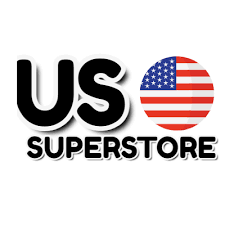

In [1]:
from IPython.display import display, Image
image_path = 'C:/Users/Sellah/Desktop/Moringa/phase_4_project/Logo.png'
display(Image(filename=image_path))

## Business Understanding and Requirement
### Introduction
Superstore is a very large supermarket based in the United States of America with presence in all the states. They are best known for sale of office supplies, furniture and Technology supplies such as phones. Using Historical data, the company wants to forecast their future sales so as to plan and make informed decisions about future operations, marketing, and resource allocation. 

Accuracy in sale predictition helps firms to adjust their strategy accordingly, anticipate future demand and identify potential problems or opportunities. Sale forecasting is a very key task that businesses need to embrace.
### Objective of the Study

This project aims to utilize time series analysis techniques on sales data from a super store. The primary goal is to forecast future sales, identify trends, patterns, and seasonality within the sales data to provide actionable insights for inventory management, marketing strategies, and overall business performance improvement.

## Data Understanding

The dataset contains the historical order details of the customers of the superstore in all the stores in the United States. This is monthly data for shipped goods from the month of July in the year 2014 to May 2018.

The dataset contains 9994 rows and 21 Columns. Below is the description of each column:


* __Order ID__: Unique identifier for each order.
* __Order Date__: Date when the order was placed.
* __Ship Date__: Date when the order was shipped.
* __Ship Mode__: Shipping mode used for the order (e.g., First Class, Standard Class, Second Class, Same Day).
* __Customer ID__: Unique identifier for each customer.
* __Customer Name__: Name of the customer.
* __Segment__: Segmentation of customers (Consumer, Corporate, Home Office).
* __Country__: Country where the store operates (contains only United States).
* __City__: City where the order was shipped.
* __State__: State where the order was shipped.
* __Postal Code__: Postal code of the shipping address.
* __Region__: Geographical region of the United States (e.g., East, West, North, South).
* __Product ID__: Unique identifier for each product.
* __Category__: Category of the product (Furniture, Office Supplies, Technology).
* __Sub-Category__: Sub-category of the product (Bookcases, Chairs, Labels, Tables, Storage, Furnishings, Art, Phones, Binders, Paper, Appliances, Accessories, Copiers, Envelopes, Fasteners, Machines, Supplies).
* __Product Name__: Name of the product.
* __Sales__: Total sales revenue for the order.
* __Quantity__: Quantity of products ordered.
* __Discount__: Percentage of discount applied to the order.
* __Profit__: Profit generated from the order.


In [2]:
# importing the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
import pmdarima as pm
import warnings
warnings.filterwarnings("ignore")

In [3]:
### Reading and previewing the data
df = pd.read_excel('Superstore.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

We observe the following key points from the summary information:
1. The dataset includes colums with different data types. All columns appear to be in the expected data type.
* int64: There are three columns of integer type: Row ID, Postal Code, and Quantity.
* float64: Three columns (Sales, Discount, Profit) are of floating-point numeric type.
* object: Thirteen columns are of object type, generally representing categorical or textual data.
* datetime64[ns]: Two columns (Order Date, Ship Date) are of datetime type, representing dates and times.

2.  Every column within the dataset comprises 9994 non-null entries. This implies the absence of any missing values throughout the columns.

In [6]:
df.shape

(9994, 21)

The dataset contains 9994 rows and 21 Columns. Below are the names of each column.

In [7]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

### Data Cleaning and Pre-processing

In [8]:
#Checking for null values
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

From the above cell we note that our data has no missing values.

In [9]:
#Checking for duplicates
df.duplicated().sum()

0

From the above cell our data has no duplicated rows

### Exploratory Data Analysis

In [10]:
# Grouping the data by 'Segment' and calculating the total sales for each segment
segment_sales = df.groupby('Segment')['Sales'].sum().reset_index()
segment_sales

,Segment,Sales
0,Consumer,1.161401e+06
1,Corporate,7.061464e+05
2,Home Office,4.296531e+05


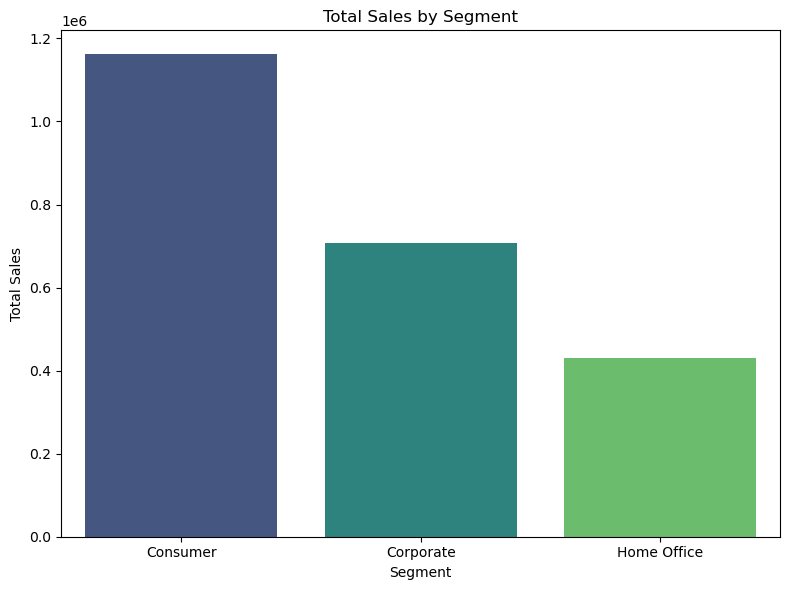

In [11]:
# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Segment', y='Sales', data=segment_sales, palette='viridis')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.title('Total Sales by Segment')
plt.xticks()
plt.tight_layout()

plt.show()

With the highest total sales reaching approximately USD.1.16 million, the Consumer segment stands out as the primary contributor to overall revenue.
The Corporate segment stands as the second-highest revenue generator with sales revenue totaling around USD.706,146.
The Home Office segment, yielding sales revenue of roughly USD.429,653, demonstrates a comparatively lower but still substantial contribution to the superstore's total revenue.

In [12]:
# Grouping the data by 'Segment' and calculating the total profit for each segment
segment_profit = df.groupby('Segment')['Profit'].sum().reset_index()
segment_profit

,Segment,Profit
0,Consumer,134119.2092
1,Corporate,91979.1340
2,Home Office,60298.6785


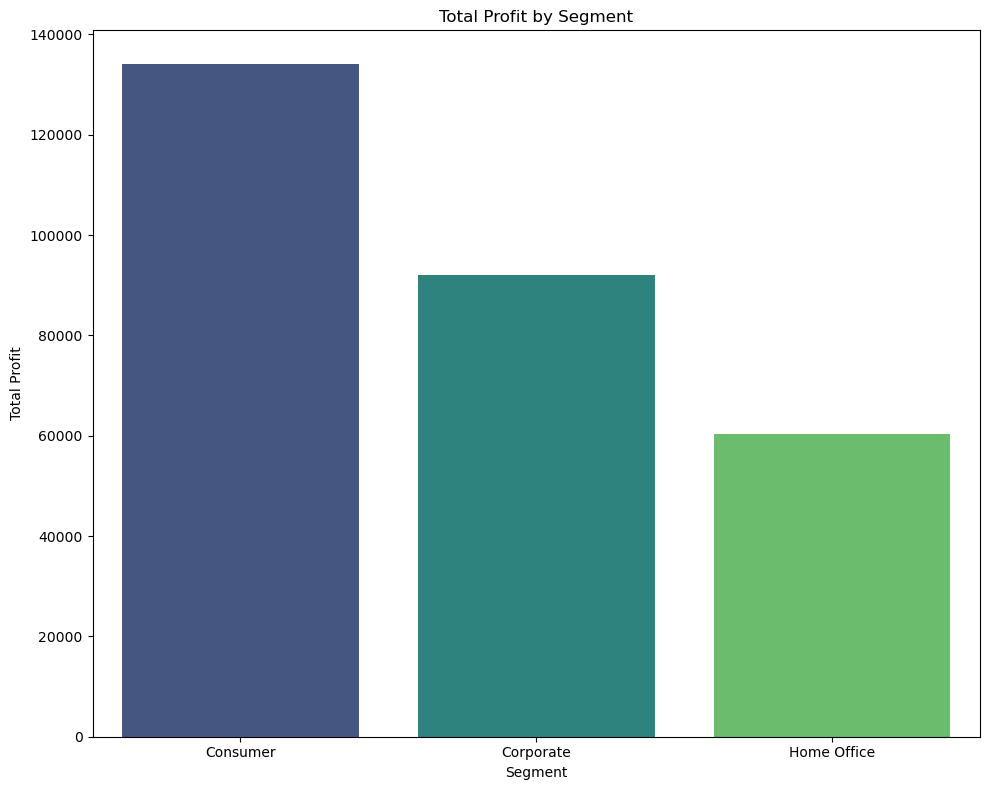

In [13]:
# Plotting the horizontal bar chart using Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='Segment', y='Profit', data=segment_profit, palette='viridis')
plt.xlabel('Segment')
plt.ylabel('Total Profit')
plt.title('Total Profit by Segment')
plt.tight_layout()

plt.show()

* The Consumer segment emerges as the dominant force, contributing the highest sales revenue and achieving the highest profitability of \\$134,119.21. 
* In contrast, the Corporate segment, despite generating a notable sales volume, reports a comparatively lower profit of \\$91,979.13, suggesting a slightly lower profitability relative to sales. 
* The Home Office segment lags behind in both sales and profitability, earning \\$60,298.68, indicating its lower revenue contribution and more moderate profitability compared to the other segments. 

Overall, the Consumer segment stands out by not only leading in sales but also maintaining higher profitability relative to its sales figures.

In [14]:
# Grouping the data by 'Category' and calculating the total sales for each category
category_sales = df.groupby('Category')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
category_sales

,Category,Sales
2,Technology,836154.0330
0,Furniture,741999.7953
1,Office Supplies,719047.0320


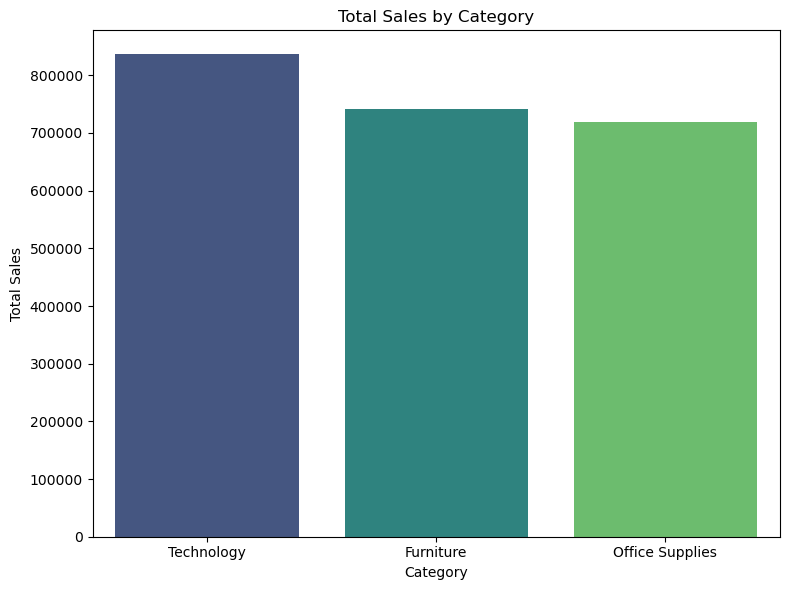

In [15]:
# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Sales', data=category_sales, palette='viridis')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Total Sales by Category')
plt.xticks()
plt.tight_layout()

plt.show()

The Technology category emerges as the leading revenue generator with total sales reaching USD.836,154.03.
Following closely behind, the Furniture category reports a substantial sales figure of USD.741,999.80, signifying a considerable consumer interest in furniture-related products.
The Office Supplies category secures USD.719,047.03 in sales, slightly trailing the Furniture category, indicating a competitive position within the market.


In [16]:
# Grouping the data by 'Sub-Category' and calculating the total sales for each sub-category
subcategory_sales = df.groupby('Sub-Category')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
subcategory_sales

,Sub-Category,Sales
13,Phones,330007.0540
5,Chairs,328449.1030
14,Storage,223843.6080
16,Tables,206965.5320
3,Binders,203412.7330
11,Machines,189238.6310
0,Accessories,167380.3180
6,Copiers,149528.0300
4,Bookcases,114879.9963
1,Appliances,107532.1610


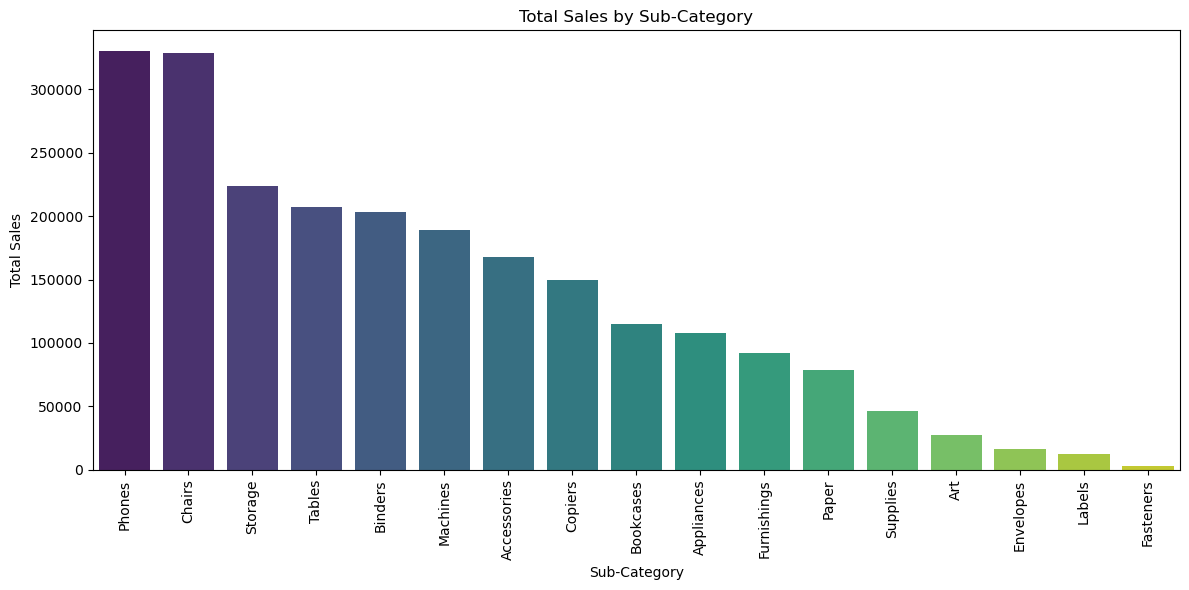

In [17]:
# Plotting the bar chart using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Sub-Category', y='Sales', data=subcategory_sales, palette='viridis')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.title('Total Sales by Sub-Category')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

Phones and Chairs emerge as the leading sub-categories, demonstrating remarkable sales figures of USD.330,007.05 and USD.328,449.10, respectively, showcasing their significance in driving revenue within the superstore.
Storage and Tables secure notable sales figures of USD.223,843.61 and USD.206,965.53, respectively, emphasizing their substantial contributions to overall sales.
Binders and Machines follow closely, reporting robust sales figures of USD.203,412.73 and USD.189,238.63, respectively.
However, at the lower end, Labels, Fasteners, and Envelopes exhibit comparatively lower sales figures of USD.12,486.31, USD.3,024.28, and USD.16,476.40, respectively, within the sub-category sales landscape.

In [18]:
# Grouping the data by 'Sub-Category' and calculating the total profit for each sub-category
subcategory_profit = df.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)
subcategory_profit

,Sub-Category,Profit
6,Copiers,55617.8249
13,Phones,44515.7306
0,Accessories,41936.6357
12,Paper,34053.5693
3,Binders,30221.7633
5,Chairs,26590.1663
14,Storage,21278.8264
1,Appliances,18138.0054
9,Furnishings,13059.1436
7,Envelopes,6964.1767


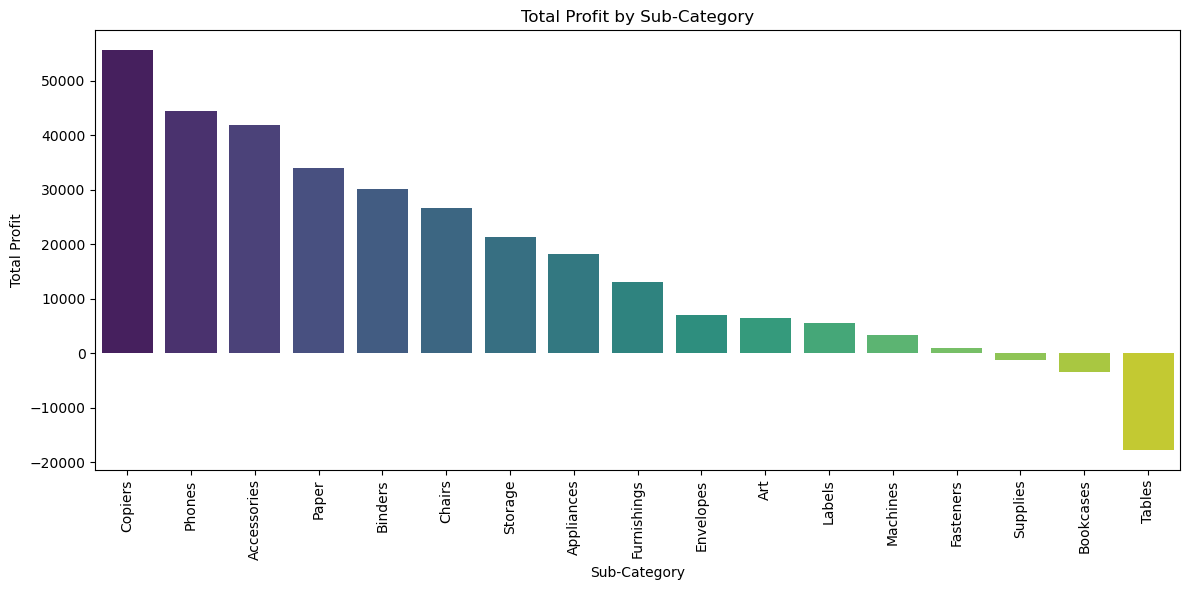

In [19]:
# Plotting the bar chart using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Sub-Category', y='Profit', data=subcategory_profit, palette='viridis')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.title('Total Profit by Sub-Category')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

* Copiers emerge as the most profitable sub-category, generating a substantial profit of \\USD.55,617.82, indicating robust financial success and higher profit margins within this product sector. 
* Phones and Accessories follow closely, reporting profits of \\USD.44,515.73 and \\USD.41,936.64, respectively, showcasing strong profitability within these categories. 
* Notably, Paper, Binders, and Chairs also demonstrate respectable profitability, reporting profits of \\USD.34,053.57, \\USD.30,221.76, and \\USD.26,590.17, respectively. 
* However, some sub-categories, such as Supplies, Bookcases, and Tables, incur losses, indicating negative profit margins in these product sectors. 

In [20]:
# Grouping the data by 'State' and calculating the total sales for each state
state_sales = df.groupby('State')['Sales'].sum().reset_index().nlargest(10, 'Sales')
state_sales

,State,Sales
3,California,457687.6315
30,New York,310876.2710
41,Texas,170188.0458
45,Washington,138641.2700
36,Pennsylvania,116511.9140
8,Florida,89473.7080
11,Illinois,80166.1010
33,Ohio,78258.1360
20,Michigan,76269.6140
44,Virginia,70636.7200


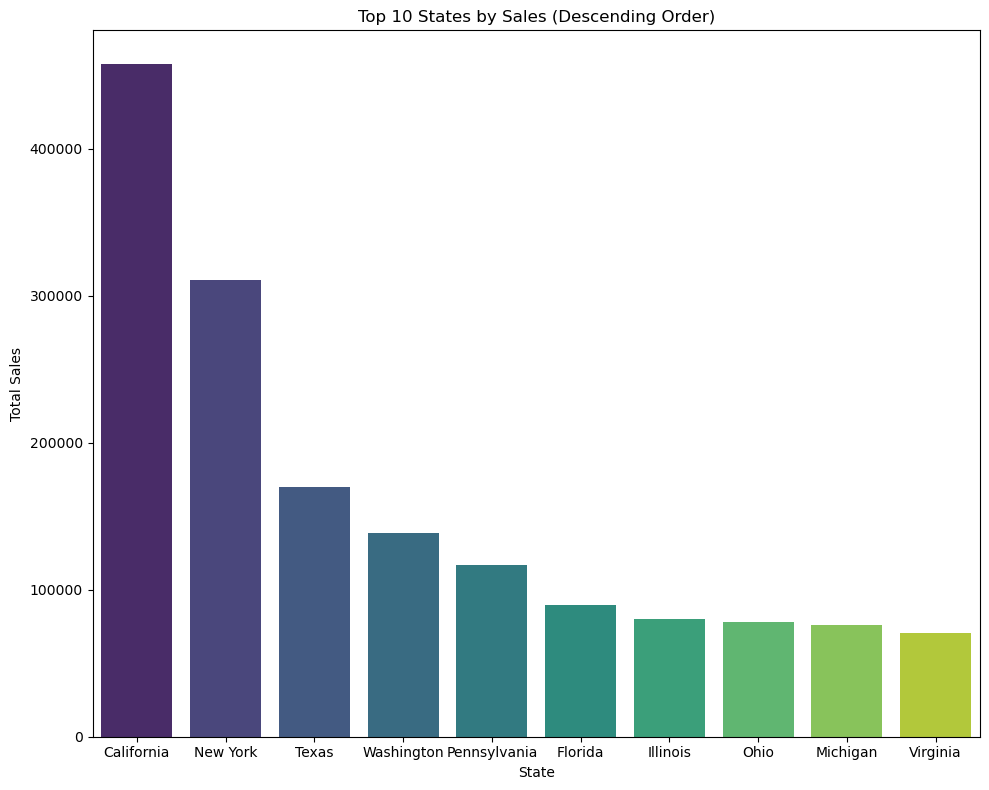

In [21]:
# Plotting the horizontal bar chart using Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='State', y='Sales', data=state_sales, palette='viridis')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.title('Top 10 States by Sales (Descending Order)')
plt.tight_layout()

plt.show()

California emerges as the top-performing state in terms of sales revenue, generating a substantial sales figure of USD.457,687.63, showcasing its significance in driving revenue for the superstore. Following closely behind, New York reports significant sales of USD.310,876.27, securing a prominent position in sales performance among the states. Texas and Washington also demonstrate respectable sales figures, contributing USD.170,188.05 and USD.138,641.27, respectively, to the superstore's overall sales revenue. Pennsylvania, Florida, Illinois, Ohio, Michigan, and Virginia round out the top 10 states in terms of sales, each displaying notable but comparatively lower sales figures.

## Data Preprocessing

In [22]:
# Dropping columns that are not required
data = df[['Order Date','Sales']]
data.head()

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
2,2016-06-12,14.6200
3,2015-10-11,957.5775
4,2015-10-11,22.3680


The main objective of this study is to forecast sales. This is why we keep the sales column.
We drop ship date and remain with order date. According to Accrual principle in accounting revenue or expenses are recorded when a transaction occurs not when payment is received or made. We therefore consider sale upon order not at point of delivery or payment.

In [23]:
#Setting Order Date as index
data.set_index('Order Date',inplace=True)
data.head()

,Sales
Order Date,
2016-11-08,261.9600
2016-11-08,731.9400
2016-06-12,14.6200
2015-10-11,957.5775
2015-10-11,22.3680


<Axes: xlabel='Order Date'>

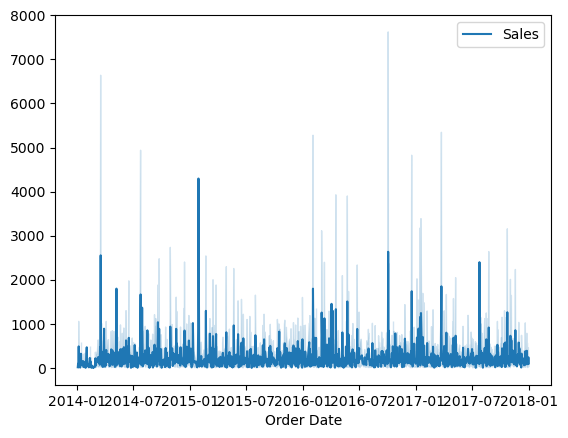

In [24]:
#Visualizing the dataset using lineplot
sns.lineplot(data)

In [25]:
#To remove noise in our dataset by resampling. 
# Where you decrease the frequency of the sales, such as from days to months
monthly_data = data.resample('MS').mean()
monthly_data.head()

,Sales
Order Date,
2014-01-01,180.213861
2014-02-01,98.258522
2014-03-01,354.719803
2014-04-01,209.595148
2014-05-01,193.838418


<Axes: xlabel='Order Date'>

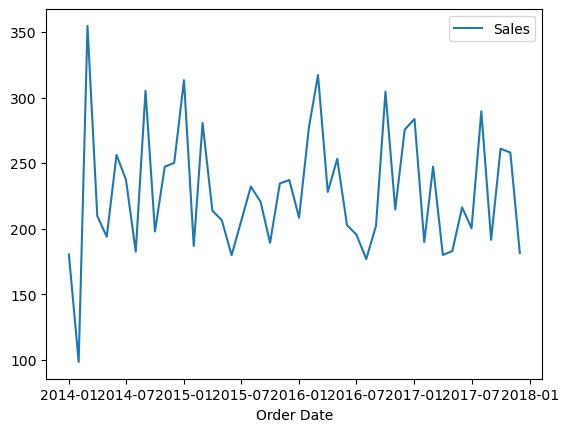

In [26]:
#Visualizing the monthly sales dataset using lineplot
sns.lineplot(monthly_data)

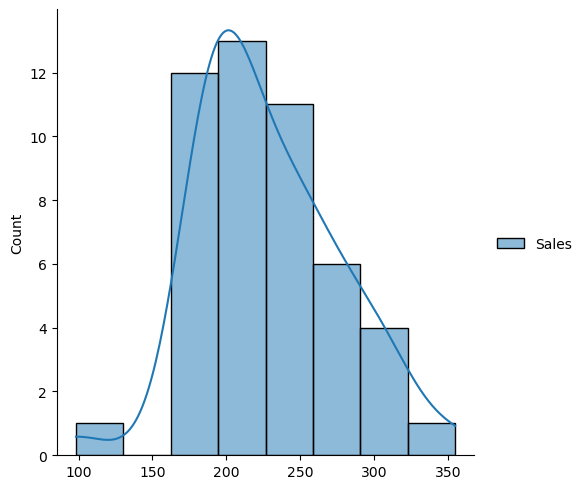

In [27]:
# visualizing the distribution of the dataset
sns.displot(monthly_data, kde=True)

### Checking for Trend

In [28]:
# Checking for trend using rolling mean
rolling_mean = monthly_data.rolling(window=6).mean()

<Axes: xlabel='Order Date', ylabel='Sales'>

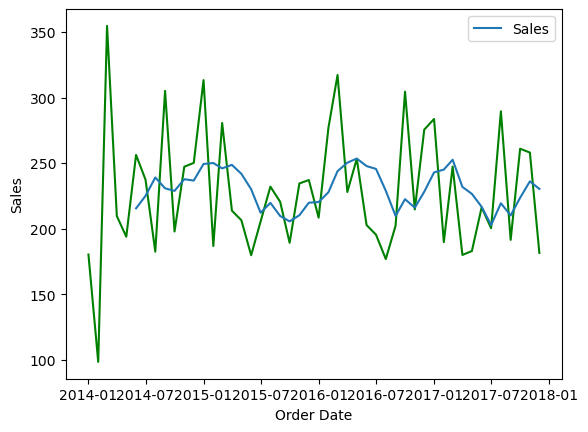

In [29]:
# comparing the two lineplot
sns.lineplot(monthly_data, x="Order Date",y="Sales", color='green')
sns.lineplot(rolling_mean)

### Testing for trends/stationarity

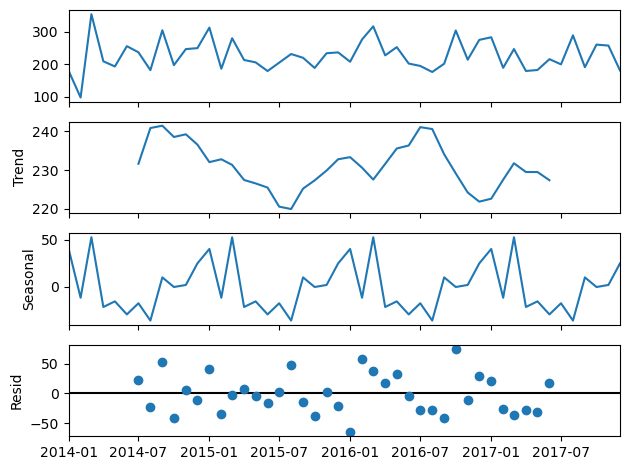

In [30]:
#Checking for sattionarity using dickyfuller test on monthly data
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(monthly_data, model ='additive')
figure = decomposition.plot()
plt.show()

In the seasonal component there is are periodic patterns therefore suggesting the presence of seasonality in the time series.

In [31]:
output  = adfuller(monthly_data)
output

(-3.2865668298704307,
 0.015489720191097255,
 10,
 37,
 {'1%': -3.6209175221605827,
  '5%': -2.9435394610388332,
  '10%': -2.6104002410518627},
 376.49084160927134)

*_Ho_ : it is non-stationary                                                                                   
*_H1_ : it is stationary                                                                                       
If p< 0.05 ; Data is stationary                                                                               
if p>0.05; Data is not stationary                                                                             
Since the p-value is 0.00020180198458237758 ,which is less than 0.05 we conclude that the data is stationary

### Plotting ACF and PACF

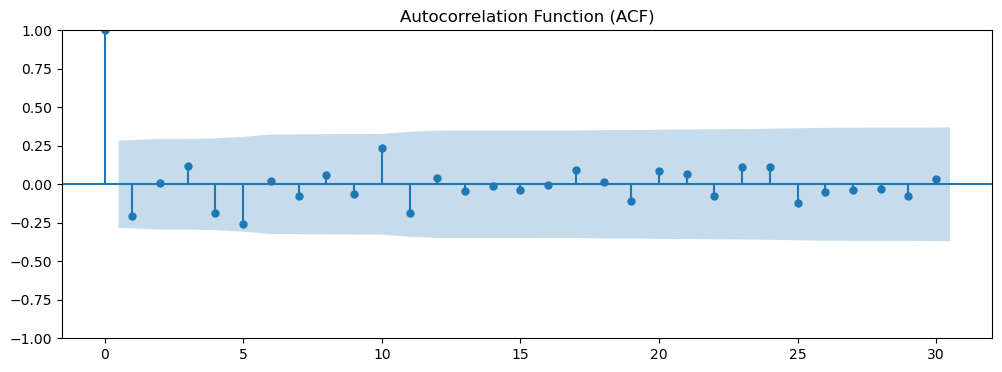

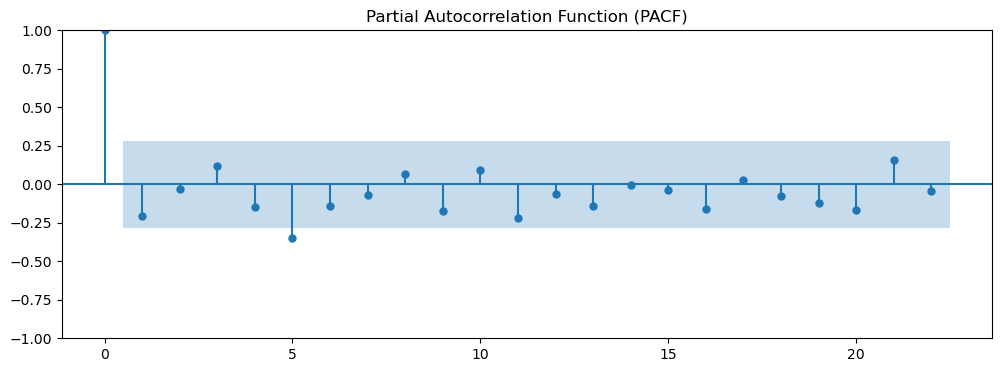

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plt.figure(figsize=(12, 4))
plot_acf(monthly_data, lags=30, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 4))
plot_pacf(monthly_data, lags=22, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

### Train Test Split

In [33]:
# Train test split for our monthly sales data
# Choose a split date
split_date = monthly_data.tail(12).index[0].strftime('%m/%d/%Y') # Get the top 12th index as a string

# Split train and test data
train_data = monthly_data[monthly_data.index < split_date]
test_data = monthly_data[monthly_data.index >= split_date]

## Modelling

### ARIMA Model

In [34]:
# Checking for best Arima Order

# Reset the index to make 'Order Date' a column
monthly_data = monthly_data.reset_index()

# Fit ARIMA models with different orders
p_values = range(3)  
q_values = range(3)  

best_aic = np.inf
best_order = None

for p in p_values:
    for q in q_values:
        order = (p, 1, q)  # ARIMA model order with differencing (d=1)
        model = ARIMA(monthly_data['Sales'], order=order)
        results = model.fit()

        # Evaluate model using AIC
        aic = results.aic
        if aic < best_aic:
            best_aic = aic
            best_order = order

# Display the best order and AIC
print(f"Best ARIMA Order: {best_order}")
print(f"AIC for the Best Model: {best_aic}")

Best ARIMA Order: (0, 1, 1)
AIC for the Best Model: 505.25176483524


In [35]:
# Set best order as the values obtained
best_order = (0, 1, 1)  

# Fit ARIMA model with the best orders
arima_model = ARIMA(monthly_data['Sales'], order=best_order)
arima_fit = arima_model.fit()

# Display the summary of the model
print(arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -250.626
Date:                Thu, 14 Dec 2023   AIC                            505.252
Time:                        12:23:43   BIC                            508.952
Sample:                             0   HQIC                           506.644
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9972      3.016     -0.331      0.741      -6.908       4.914
sigma2      2314.4793   6927.230      0.334      0.738   -1.13e+04    1.59e+04
Ljung-Box (L1) (Q):                   1.88   Jarque-

**Building and testing ARIMA model using Train-Test Split**

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -188.665
Date:                Thu, 14 Dec 2023   AIC                            381.331
Time:                        12:23:43   BIC                            384.441
Sample:                    01-01-2014   HQIC                           382.404
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9974      5.532     -0.180      0.857     -11.840       9.845
sigma2      2545.9141    1.4e+04      0.182      0.855   -2.48e+04    2.99e+04
Ljung-Box (L1) (Q):                   1.70   Jarque-

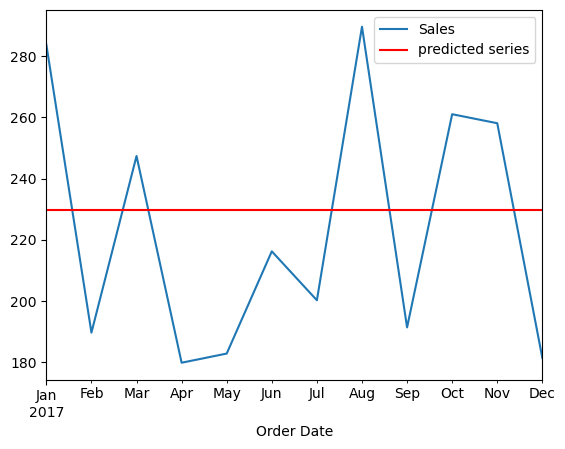

In [36]:
# Fit ARIMA model with the best orders on train set
arima_model = ARIMA(train_data, order=best_order)
arima_fit2 = arima_model.fit()

# Display the summary of the model
print(arima_fit2.summary())

# Get the last date in the training data
last_date_train = train_data.index[-1]

# Determine the number of months for the forecast
forecast_months = len(test_data)

# Forecast start date and end date adjustment by months
forecast_start_date = last_date_train + pd.DateOffset(months=1)
forecast_end_date = forecast_start_date + pd.DateOffset(months=forecast_months-1)
# Forecast for the specific date range
arima_pred = arima_fit2.predict(start=forecast_start_date, end=forecast_end_date)

#Calculating the MSE & RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
mse_arima= mean_squared_error(test_data,arima_pred)
rmse_arima = sqrt(mean_squared_error(test_data,arima_pred))
print("\n")
print(f"ARIMA Model - MSE: {mse_arima:.2f}, RMSE: {rmse_arima:.2f}")

# Plot forecasts against actual outcomes
test_data.plot(label= 'test series')
arima_pred.plot(color='red', label='predicted series')
plt.legend()
plt.show()

### PMDARIMA Model

**Building and testing PMDARIMA model using Train-Test Split**

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   36
Model:                        SARIMAX   Log Likelihood                -191.696
Date:                Thu, 14 Dec 2023   AIC                            387.392
Time:                        12:23:45   BIC                            390.559
Sample:                    01-01-2014   HQIC                           388.497
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    229.6620      8.435     27.228      0.000     213.130     246.194
sigma2      2469.8240    529.950      4.660      0.000    1431.142    3508.506
Ljung-Box (L1) (Q):                   1.70   Jarque-

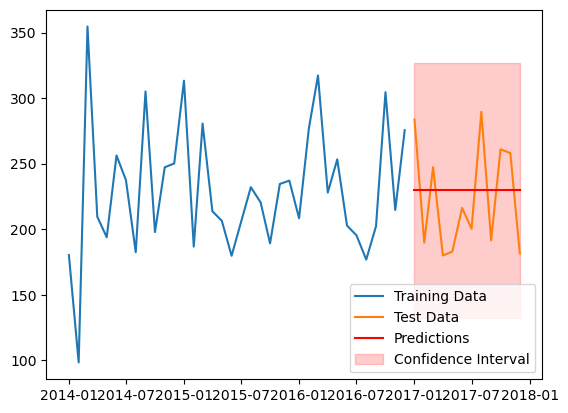

In [37]:
## Building and testing PMDARIMA model using Train-Test Split
from pmdarima import auto_arima
pmdarima_model = auto_arima(train_data, seasonal=True, m=12)
print(pmdarima_model.summary())
predictions, conf_int =pmdarima_model.predict(n_periods=len(test_data), return_conf_int=True)

#Calculating the MSE & RMSE
mse_pmdarima= mean_squared_error(test_data,predictions)
rmse_pmdarima = sqrt(mean_squared_error(test_data,predictions))
print("\n")
print(f"PMDARIMA Model - MSE: {mse_pmdarima:.2f}, RMSE: {rmse_pmdarima:.2f}")

# plotting the test set(actual) and predict model(frecast) to see a comparisson
# Plot forecasts against actual outcomes
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, predictions, label='Predictions', color='red')
plt.fill_between(test_data.index, conf_int[:, 0], conf_int[:, 1], color='red', alpha=0.2, label='Confidence Interval')
plt.legend()
plt.show()

### Facebook Prophet Model

In [38]:
# Prepare the data in the required format for Prophet
#monthly_data.reset_index(inplace=True)
prophet_df = pd.DataFrame({'ds': monthly_data['Order Date'], 'y': monthly_data['Sales']})
# Initialize and fit the Prophet model
prophet_model = Prophet()
#prophet_model.fit(prophet_df)
# Create a DataFrame with future dates for prediction
#future = model.make_future_dataframe(periods=12, freq='MS')  


In [39]:
#Splitting train and test data
len(prophet_df)
prophet_train = prophet_df.iloc[:len(prophet_df)-12]
prophet_test = prophet_df.iloc[len(prophet_df)-12:]

# Making predictions
prophet_model = Prophet()
prophet_model.fit(prophet_train)
future = prophet_model.make_future_dataframe(periods=24, freq='MS')  
facebook_pred=prophet_model.predict(future)

12:23:50 - cmdstanpy - INFO - Chain [1] start processing
12:23:53 - cmdstanpy - INFO - Chain [1] done processing


In [40]:
facebook_pred.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
55,2018-08-01,254.609211,159.046038,231.456438,254.608738,254.609720,-59.885517,-59.885517,-59.885517,-59.885517,-59.885517,-59.885517,0.0,0.0,0.0,194.723694
56,2018-09-01,254.326166,205.816020,274.267375,254.325668,254.326710,-15.027289,-15.027289,-15.027289,-15.027289,-15.027289,-15.027289,0.0,0.0,0.0,239.298877
57,2018-10-01,254.052252,172.944392,244.971239,254.051722,254.052826,-46.052413,-46.052413,-46.052413,-46.052413,-46.052413,-46.052413,0.0,0.0,0.0,207.999839
58,2018-11-01,253.769208,188.338888,258.166307,253.768645,253.769810,-29.959108,-29.959108,-29.959108,-29.959108,-29.959108,-29.959108,0.0,0.0,0.0,223.810100
59,2018-12-01,253.495293,203.202917,273.916175,253.494694,253.495922,-16.215592,-16.215592,-16.215592,-16.215592,-16.215592,-16.215592,0.0,0.0,0.0,237.279701


In [41]:
facebook_pred.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
55,2018-08-01,254.609211,159.046038,231.456438,254.608738,254.609720,-59.885517,-59.885517,-59.885517,-59.885517,-59.885517,-59.885517,0.0,0.0,0.0,194.723694
56,2018-09-01,254.326166,205.816020,274.267375,254.325668,254.326710,-15.027289,-15.027289,-15.027289,-15.027289,-15.027289,-15.027289,0.0,0.0,0.0,239.298877
57,2018-10-01,254.052252,172.944392,244.971239,254.051722,254.052826,-46.052413,-46.052413,-46.052413,-46.052413,-46.052413,-46.052413,0.0,0.0,0.0,207.999839
58,2018-11-01,253.769208,188.338888,258.166307,253.768645,253.769810,-29.959108,-29.959108,-29.959108,-29.959108,-29.959108,-29.959108,0.0,0.0,0.0,223.810100
59,2018-12-01,253.495293,203.202917,273.916175,253.494694,253.495922,-16.215592,-16.215592,-16.215592,-16.215592,-16.215592,-16.215592,0.0,0.0,0.0,237.279701


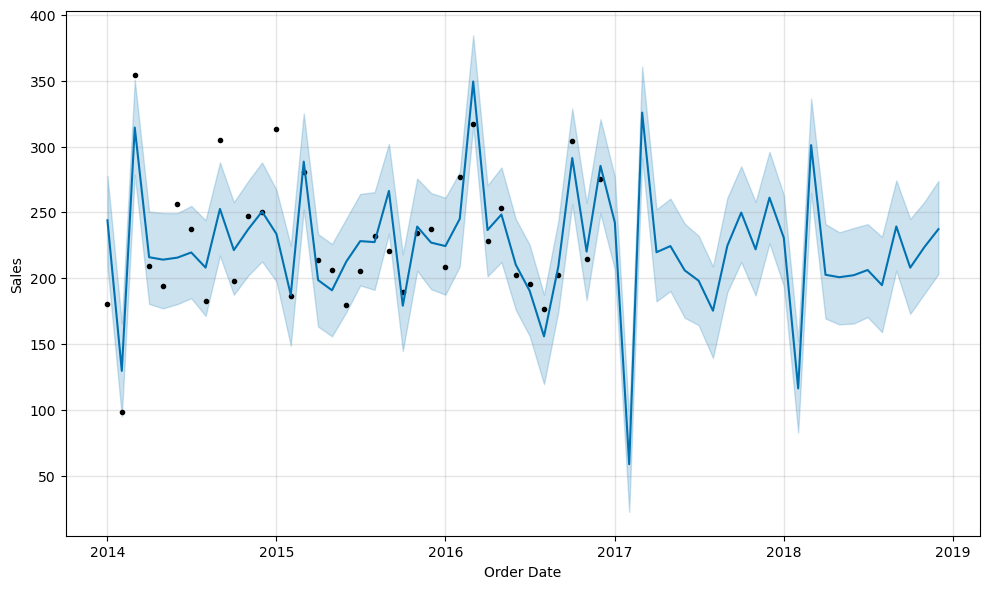

In [42]:
# Plot the original data and the forecast
from prophet.plot import plot_plotly, plot_components_plotly
fig = prophet_model.plot(facebook_pred, xlabel='Order Date', ylabel='Sales')
plt.show()

In [43]:
# Change the index of forecasted series
#facebook_pred = facebook_pred.set_index('ds')

# Extract the predicted values from the forecast
y_pred = facebook_pred['yhat'].tail(len(prophet_test))

# Extract the actual values from the test set
y_true = prophet_test['y'].values

# Calculate MSE & RMSE
mse_fb_prophet= mean_squared_error(y_true, y_pred)
rmse_fb_prophet = sqrt(mean_squared_error(y_true, y_pred))
print("\n")
print(f"Facebook Prophet Model - MSE: {mse_fb_prophet:.2f}, RMSE: {rmse_fb_prophet:.2f}")



Facebook Prophet Model - MSE: 2544.91, RMSE: 50.45


## Conclusion

After thorough model evaluation among the three models, Arima, Sarima and Facebook Prophet. Using the plots of actual vs predicted valuals of the three models ; Facebook prophet had the best plot.                          This study therefore used Facebook Prophet to forecast sales for Superstore supermarket.
The prediction indicates a deep in sales.
The month of January 2018 will experience the lowest deep  with sales as low as 110. 

## Recommendations

This study recommends:
Increased use of digital marketting strategy to promote sales in future.             
The sales team should also consider discounts in future so as to entice customers thereby increasing sales.
Since there is probability of decline in sales in the future, the Company should avoid overstocking.